# Tannis McCartney
## June 21, 2022
## Exploratory Visual Analysis

#### Table of Contents
01 Import Libraries

02 Import Dataset

03 Create subset for correlation analysis

04 Correlation analysis

05 Scatterplots for variables with strongest correlations

06 Pair plots

07 Categorical plots

08 Discussion

# 01 Import libraries

In [1]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import os

In [2]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02 Import data

In [3]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\6 Advanced Analytics and Dashboard Design\Nova Scotia Housing and Income'  

In [4]:
# Load 2018 Canadian Income Survey
CIS2018 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CIS2018_subset.pkl'))
CIS2018.head()

,household_id,person_id,sample_weight,province,age_group,gender,marital_status,after_tax_income,household_size,household_composition,...,disposable_income_below_mbm_flag,ownership_of_dwelling,monthly_mortgage_payment,monthly_condo_fee,monthly_rent,rent_subsidy_flag,core_housing_need_indicator,adult_food_security_status,child_food_security_status,household_food_security_status
0,2129,212901,208.9708,Ontario,25 to 29 years,Female,Common-law,44265.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure
1,2129,212902,208.9708,Ontario,25 to 29 years,Male,Common-law,42985.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure
2,2130,213001,1101.2217,British Columbia,45 to 49 years,Female,Common-law,82370.0,2,Two or more person household/One economic family,...,No,Not owned by a member of the household,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure
3,2130,213002,1101.2217,British Columbia,55 to 59 years,Female,Common-law,49105.0,2,Two or more person household/One economic family,...,No,Not owned by a member of the household,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure
4,2131,213101,165.3016,Saskatchewan,55 to 59 years,Female,Married,21000.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,1600.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure


In [5]:
# Check sum of sample_weight column: it should approximate the population of Canada
CIS2018['sample_weight'].sum()

36329666.0139

The sum of sample_weight is correct

# 03 Create subset for correlation analysis

In [6]:
# Select columns from CIS2018 for correlation analysis
df1 = CIS2018[['after_tax_income','household_size','monthly_mortgage_payment', 'monthly_condo_fee', 'monthly_rent']]
df1.head()

,after_tax_income,household_size,monthly_mortgage_payment,monthly_condo_fee,monthly_rent
0,44265.0,2,2000.0,NaN,NaN
1,42985.0,2,2000.0,NaN,NaN
2,82370.0,2,NaN,NaN,2900.0
3,49105.0,2,NaN,NaN,2900.0
4,21000.0,2,1600.0,NaN,NaN


# 04 Correlation analysis

In [7]:
# Create a correlation matrix for the CIS2018 data
df1.corr()

,after_tax_income,household_size,monthly_mortgage_payment,monthly_condo_fee,monthly_rent
after_tax_income,1.000000,0.015157,0.211959,0.129760,0.201988
household_size,0.015157,1.000000,0.193214,-0.071858,0.226644
monthly_mortgage_payment,0.211959,0.193214,1.000000,0.147089,NaN
monthly_condo_fee,0.129760,-0.071858,0.147089,1.000000,NaN
monthly_rent,0.201988,0.226644,NaN,NaN,1.000000


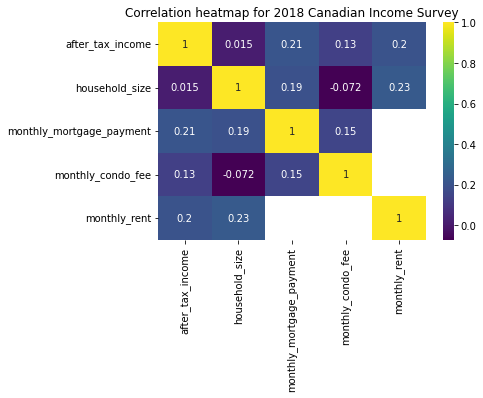

In [8]:
# Create a seaborn heatmap for the CIS2018 data
heatmap2018 = sns.heatmap(df1.corr(),
                      annot=True,
                      cmap='viridis')
heatmap2018.set_title('Correlation heatmap for 2018 Canadian Income Survey');

The sample weights have not been applied, but I think that's ok for correlations. The blank squares, with no coefficient, represent the places where the values cannot be correlated. For example, a household paying rent will not also have a mortgage payment.

None of these variables have a strong relationship. The strongest correlation, between monthly rent and household size has a coefficient of 0.23, which is a weak correlation.

The yellow colours, with coefficient = 1, represent the correlation of a variable with itself.  The darker the blue, and the closer the correlation coefficient is to zero, the weaker the relationship between the variables. 

# 05 Scatterplots for variables with strongest correlations

Because the correlations for this dataset are all weak, no scatterplots have been generated. The Exploratory Visual Analysis for the NS Housing Market Indicators has scatterplots for strongly correlated variables.

# 06 Pair plots

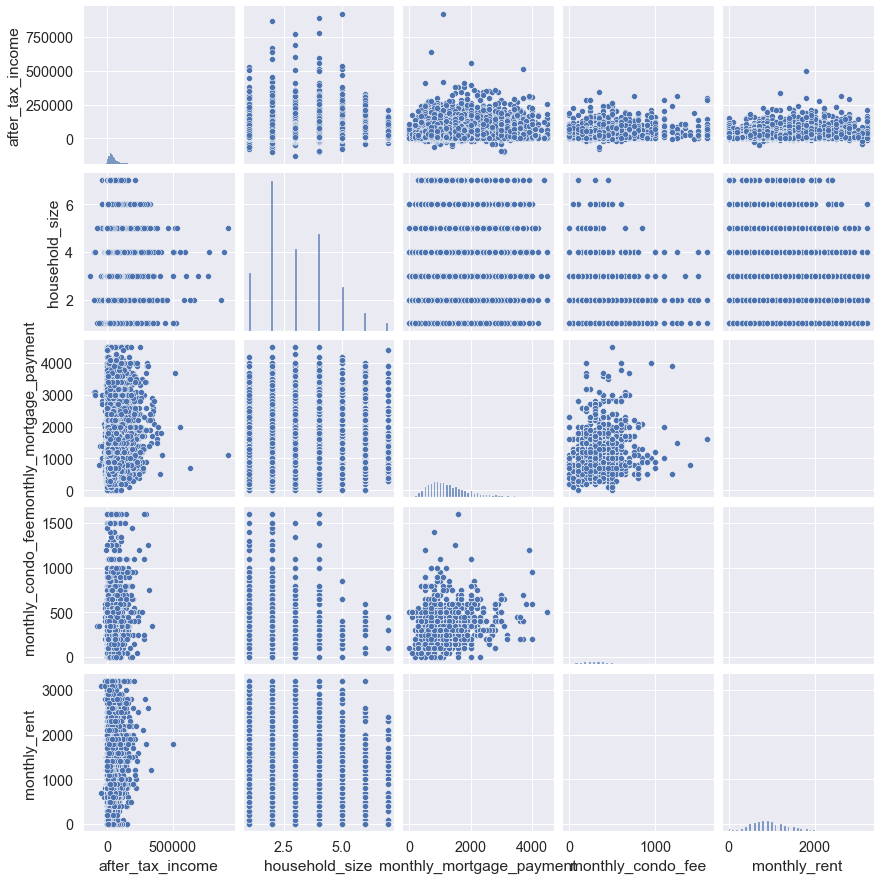

In [9]:
# Create a pair plot for the 2018 CIS
sns.set(font_scale=1.3)
pair2018 = sns.pairplot(df1)

Sample weights have not been applied, but I think that's ok. This analysis shows relationships within the sample.

Household size is a categorical variable. 

When comparing after tax income to rent vs mortgage payment, it definitely seems like there may be a correlation between income and being a renter vs owner. This is worth exploring.

There may be a relationship between mortgage payments and condo fees. Should condo fees be combined with mortgage payments for total ownership costs?

# 07 Categorical plots

<AxesSubplot:xlabel='after_tax_income', ylabel='Count'>

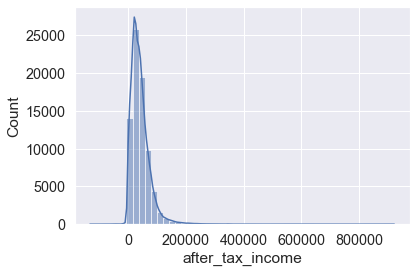

In [10]:
# View distribution of after_tax_income
sns.histplot(df1['after_tax_income'], bins = 50, kde = True)

In [11]:
# Set low income flag
df1.loc[(df1['after_tax_income'] < 50000), 'income_flag'] = '000000-49999'

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_9916\4119627225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[(df1['after_tax_income'] < 50000), 'income_flag'] = '000000-49999'


In [12]:
# Set middle income flag
df1.loc[((df1['after_tax_income'] >= 50000) & (df1['after_tax_income'] < 100000)), 'income_flag'] = '50000-99999'

In [13]:
# Set upper income flag
df1.loc[(df1['after_tax_income'] > 100000), 'income_flag'] = '100000 +'

In [14]:
# View frequency table of income_flag
df1['income_flag'].value_counts()

000000-49999    54521
50000-99999     19147
100000 +         3479
Name: income_flag, dtype: int64

The sample weight has not been applied, therefore this frequency table only represents the sample, not the population.

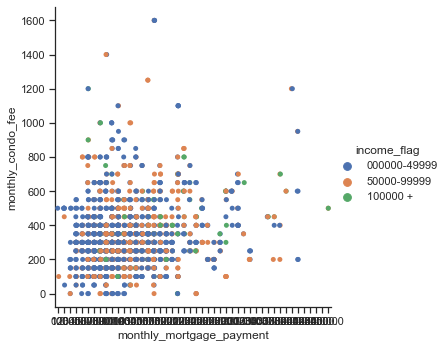

In [15]:
# Create a categorical plot
sns.set(style="ticks")
sns.catplot(x="monthly_mortgage_payment", y="monthly_condo_fee", hue="income_flag", data=df1)

I don't see any clustering emerging. This doesn't tell me much (not even enough to bother fixing the x-axis labels). I'm not sure what I expected. 

# 08 Discussion

***Where do Canadians live?*** and ***Where do low-income Canadians live?*** cannot be answered with this exploratory visual analysis.

##### What is the income distribution in Canada?

<AxesSubplot:xlabel='after_tax_income'>

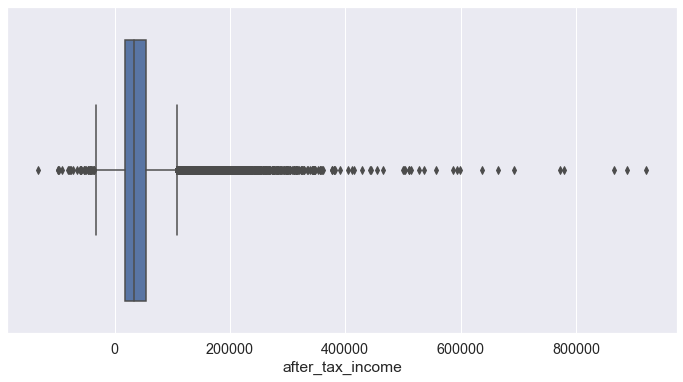

In [16]:
# Create a boxplot for after-tax income
plt.figure(figsize=(12,6))
sns.set(font_scale=1.3)
sns.boxplot(x=df1['after_tax_income'])

In [17]:
round(df1['after_tax_income'].mean())

40811

In [18]:
df1['after_tax_income'].median()

34355.0

The after-tax income **for the sample** is right-skewed. This may have important implications for using average income as a benchmark for what affordable housing is. This is showing the incomes for each person. Should there be a combined household income calculated field? 

##### Is the after-tax income of Nova Scotians skewed?

In [19]:
# Create a subset for Nova Scotia
NSincome = CIS2018.loc[CIS2018['province']=='Nova Scotia']
NSincome.head()

,household_id,person_id,sample_weight,province,age_group,gender,marital_status,after_tax_income,household_size,household_composition,...,disposable_income_below_mbm_flag,ownership_of_dwelling,monthly_mortgage_payment,monthly_condo_fee,monthly_rent,rent_subsidy_flag,core_housing_need_indicator,adult_food_security_status,child_food_security_status,household_food_security_status
10,2133,213301,119.6088,Nova Scotia,35 to 39 years,Male,Married,23030.0,3,Two or more person household/One economic family,...,No,Owned by a member of the household,400.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure
11,2133,213302,119.6088,Nova Scotia,35 to 39 years,Female,Married,32160.0,3,Two or more person household/One economic family,...,No,Owned by a member of the household,400.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure
12,2133,213303,119.6088,Nova Scotia,6 to 9 years,Female,Valid skip,NaN,3,Two or more person household/One economic family,...,No,Owned by a member of the household,400.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure
13,2134,213401,152.1021,Nova Scotia,25 to 29 years,Female,Not stated,8425.0,3,Two or more person household/One economic family,...,No,Owned by a member of the household,1100.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure
14,2134,213402,152.1021,Nova Scotia,25 to 29 years,Male,Not stated,33325.0,3,Two or more person household/One economic family,...,No,Owned by a member of the household,1100.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure


In [20]:
# Check shape of subset
NSincome.shape

(5111, 24)

In [21]:
# Check sum of sample_weight
NSincome['sample_weight'].sum()

934556.0096

<AxesSubplot:xlabel='after_tax_income'>

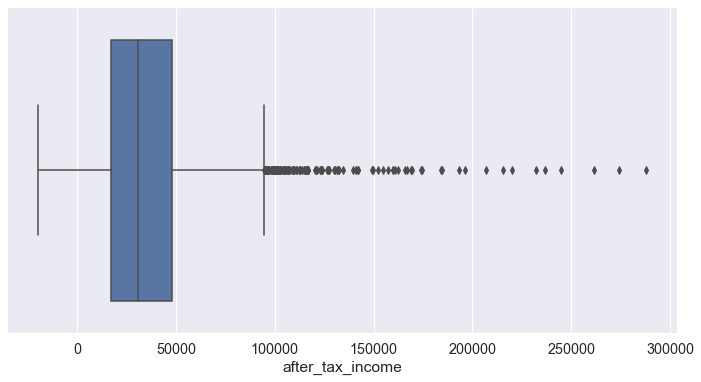

In [22]:
# Create a boxplot for after-tax income
plt.figure(figsize=(12,6))
sns.set(font_scale=1.3)
sns.boxplot(x=NSincome['after_tax_income'])

In [23]:
round(NSincome['after_tax_income'].mean())

35811

In [24]:
NSincome['after_tax_income'].median()

30820.0

The after-tax income of Nova Scotians **in the sample** is right-skewed. Not only that, the mean and median incomes of Nova Scotians are lower than the mean and median of all Canadians. This is showing the incomes for each person. Should there be a combined household income calculated field? 

##### What is the proportion homeowners to renters?

In [25]:
# Check the frequency table of household_maj_income_flag
CIS2018['household_maj_income_flag'].value_counts()

No     53479
Yes    40857
Name: household_maj_income_flag, dtype: int64

In [26]:
# Create a subset to examine households only
households2018 = CIS2018.loc[CIS2018['household_maj_income_flag']=='Yes']
households2018.shape

(40857, 24)

In [27]:
# Apply weight to ownership_of_dwelling numbers
df2 = households2018.groupby('ownership_of_dwelling')['sample_weight'].sum()

In [28]:
# Look at weighted numbers
round(df2.head())

ownership_of_dwelling
Not owned by a member of the household    4780965.0
Owned by a member of the household        9969379.0
Name: sample_weight, dtype: float64

Text(0, 0.5, '')

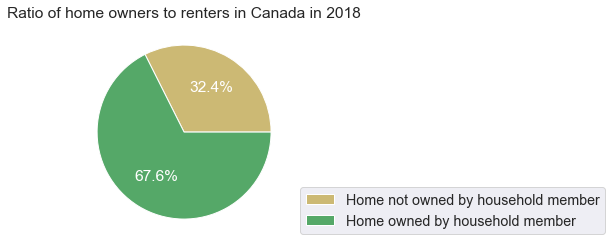

In [29]:
pie = df2.plot.pie(
    colors = ['y', 'g'],
    title = "Ratio of home owners to renters in Canada in 2018",
    autopct='%1.1f%%',
    textprops={'color':"w"},
    labels=['',''])
pie.legend(bbox_to_anchor=(1,0), loc="lower left", labels=['Home not owned by household member', 'Home owned by household member'])
pie.set_ylabel('')

Approximately 68% of households owned their homes in 2018. The sample weights have been applied, therefore this represents the population.

##### What is the proportion of low-income homeowners to renters?

In [30]:
# Check the frequency table of low_income_flag
households2018['after_tax_low_income_flag'].value_counts()

No     38118
Yes     2739
Name: after_tax_low_income_flag, dtype: int64

In [31]:
# Create a subset for low-income
LowIncome = households2018.loc[households2018['after_tax_low_income_flag']=='Yes']
LowIncome.shape

(2739, 24)

In [32]:
# Apply weight to ownership_of_dwelling numbers
df3 = LowIncome.groupby('ownership_of_dwelling')['sample_weight'].sum()

In [33]:
round(df3.head())

ownership_of_dwelling
Not owned by a member of the household    947416.0
Owned by a member of the household        427491.0
Name: sample_weight, dtype: float64

Text(0, 0.5, '')

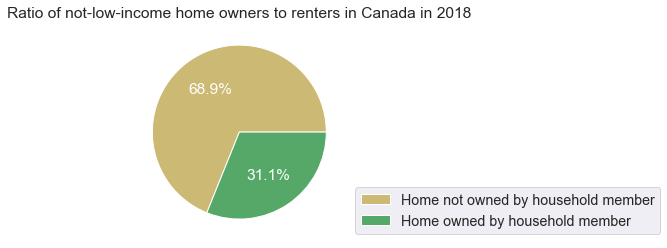

In [34]:
pie = df3.plot.pie(
    colors = ['y', 'g'],
    title = "Ratio of not-low-income home owners to renters in Canada in 2018",
    autopct='%1.1f%%',
    textprops={'color':"w"},
    labels=['',''])
pie.legend(bbox_to_anchor=(1,0), loc="lower left", 
           labels=['Home not owned by household member', 'Home owned by household member'])
pie.set_ylabel('')

Approximately 60% of low-income Canadian households do not own their own home. This is a huge contrast to the numbers for all Canadian households. I think this implies that low-income Canadians will be disproportionately affected by rental rates and rental vacancies, unless they are in government-subsidized housing. The sample weights have been applied, therefore this represents the population.

##### How many Canadians paid more than 35% of their after-tax income for housing?

In [35]:
# Calculate 35% of after-tax income and divide by twelve
atinc = households2018['after_tax_income'].apply(lambda x: x*.02917)

In [36]:
# Calculate total household costs
total_household_costs = households2018[['monthly_mortgage_payment', 'monthly_condo_fee', 'monthly_rent']].sum(axis=1)

In [37]:
# Add to dataframe
households2018['monthly_income_35_pct'] = atinc
households2018['total_household_costs'] = total_household_costs
households2018.head()

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_9916\96063651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  households2018['monthly_income_35_pct'] = atinc
C:\Users\tmmcc\AppData\Local\Temp\ipykernel_9916\96063651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  households2018['total_household_costs'] = total_household_costs


,household_id,person_id,sample_weight,province,age_group,gender,marital_status,after_tax_income,household_size,household_composition,...,monthly_mortgage_payment,monthly_condo_fee,monthly_rent,rent_subsidy_flag,core_housing_need_indicator,adult_food_security_status,child_food_security_status,household_food_security_status,monthly_income_35_pct,total_household_costs
0,2129,212901,208.9708,Ontario,25 to 29 years,Female,Common-law,44265.0,2,Two or more person household/One economic family,...,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure,1291.21005,2000.0
2,2130,213001,1101.2217,British Columbia,45 to 49 years,Female,Common-law,82370.0,2,Two or more person household/One economic family,...,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure,2402.73290,2900.0
5,2131,213102,165.3016,Saskatchewan,55 to 59 years,Male,Married,112195.0,2,Two or more person household/One economic family,...,1600.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure,3272.72815,1600.0
6,2132,213201,126.5388,Manitoba,35 to 39 years,Male,Married,70725.0,4,Two or more person household/One economic family,...,1700.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure,2063.04825,1700.0
11,2133,213302,119.6088,Nova Scotia,35 to 39 years,Female,Married,32160.0,3,Two or more person household/One economic family,...,400.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Food secure,Food secure,938.10720,400.0


In [38]:
# Set affordable_housing_flag
households2018.loc[(households2018['total_household_costs'] <= households2018['monthly_income_35_pct']), 'affordable_housing_flag'] = 'Yes'

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_9916\511670096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  households2018.loc[(households2018['total_household_costs'] <= households2018['monthly_income_35_pct']), 'affordable_housing_flag'] = 'Yes'


In [39]:
households2018.loc[(households2018['total_household_costs'] > households2018['monthly_income_35_pct']), 'affordable_housing_flag'] = 'No'

In [40]:
# Check frequency table for affordable_housing_flag
households2018['affordable_housing_flag'].value_counts()

Yes    33356
No      7501
Name: affordable_housing_flag, dtype: int64

In [41]:
# Apply weight to affordable_housing_costs
df4 = households2018.groupby('affordable_housing_flag')['sample_weight'].sum()

In [42]:
round(df4.head())

affordable_housing_flag
No      3705641.0
Yes    11044703.0
Name: sample_weight, dtype: float64

Text(0, 0.5, '')

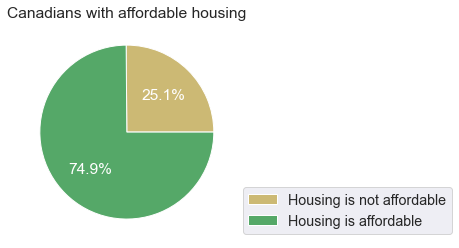

In [43]:
pie = df4.plot.pie(
    colors = ['y', 'g'],
    title = "Canadians with affordable housing",
    autopct='%1.1f%%',
    textprops={'color':"w"},
    labels=['',''])
pie.legend(bbox_to_anchor=(1,0), loc="lower left", 
           labels=['Housing is not affordable', 'Housing is affordable'])
pie.set_ylabel('')

In 2018 approximately of Canadian households were spending more than 35% of their after-tax income on housing. According to the CMHC, this is not affordable. What do these numbers look like for just Nova Scotia?

##### Additional questions from the exploratory visual analysis include:
- What is the relationship between renting vs owning a home and income?
- What percentage of Nova Scotians have affordable housing? (this can be addressed right here)

In [44]:
# Create subset for Nova Scotia
NS = households2018.loc[CIS2018['province']=='Nova Scotia']

In [45]:
# Apply weight to affordable_housing_costs
df5 = NS.groupby('affordable_housing_flag')['sample_weight'].sum()

In [46]:
round(df5.head())

affordable_housing_flag
No      72963.0
Yes    337878.0
Name: sample_weight, dtype: float64

Text(0, 0.5, '')

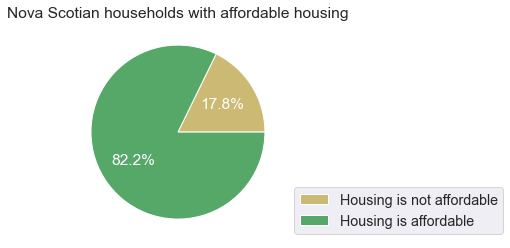

In [47]:
pie = df5.plot.pie(
    colors = ['y', 'g'],
    title = "Nova Scotian households with affordable housing",
    autopct='%1.1f%%',
    textprops={'color':"w"},
    labels=['',''])
pie.legend(bbox_to_anchor=(1,0), loc="lower left", 
           labels=['Housing is not affordable', 'Housing is affordable'])
pie.set_ylabel('')

In 2018, only 17.8% of Nova Scotians did not have affordable housing. Given recent changes in the province, this number has probably increased. It would be good to compare when the next Canadian Income Survey comes out.

**Hypothesis**: The average rents in Nova Scotia (from CMHC Housing Market Indicators) will not be affordable (< 35% of after-tax income) to low-income Nova Scotians.